# Notebook import

In [1]:
# from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather Data

In [2]:
#load_boston = fetch_openml(data_id=531, as_frame=True, parser='pandas')
load_boston = fetch_openml(data_id=531)

C:\Users\ryan6\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
boston_dataset = load_boston
 
boston_dataset['data']
 
type(boston_dataset)

sklearn.utils._bunch.Bunch

## Questions to ask for exploring data:
- Source of the data
- Description of the data available? Context
- Size of the dataset
- Number of features (think of columns in a table for every row)
- Names of the features
- Nature of the features

In [4]:
dir(boston_dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

## Datapoints and features

In [6]:
 boston_dataset.data.shape #chaining the attributes

(506, 13)

In [7]:
boston_dataset.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [8]:
# Prices in (000)$
boston_dataset.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Data exploration with Pandas dataframe

In [6]:
#Create a dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add column with price(target)
data['PRICE'] = boston_dataset.target

In [7]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [11]:
data.count() # No. of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning data - check for missing values

In [12]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


## Visualising Data - Histograms, Distributions and Bar Charts

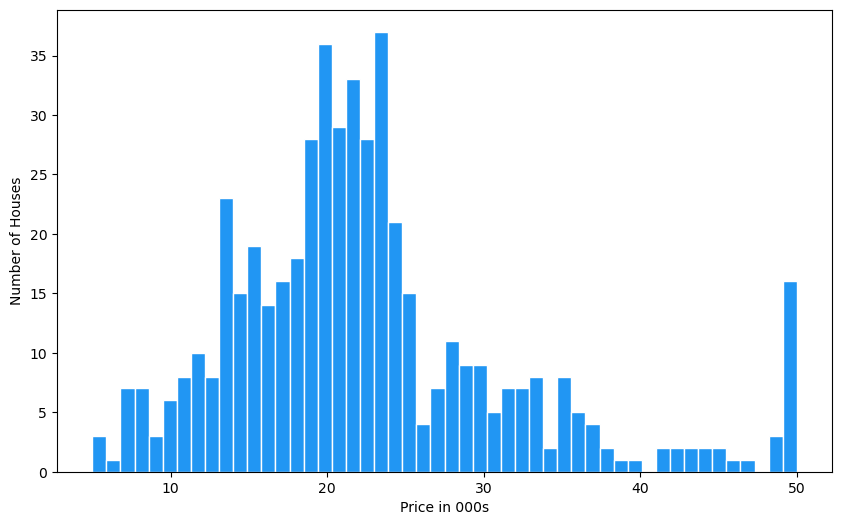

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data["PRICE"], bins=50, ec='white', color='#2196F3')
plt.xlabel("Price in 000s")
plt.ylabel("Number of Houses")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

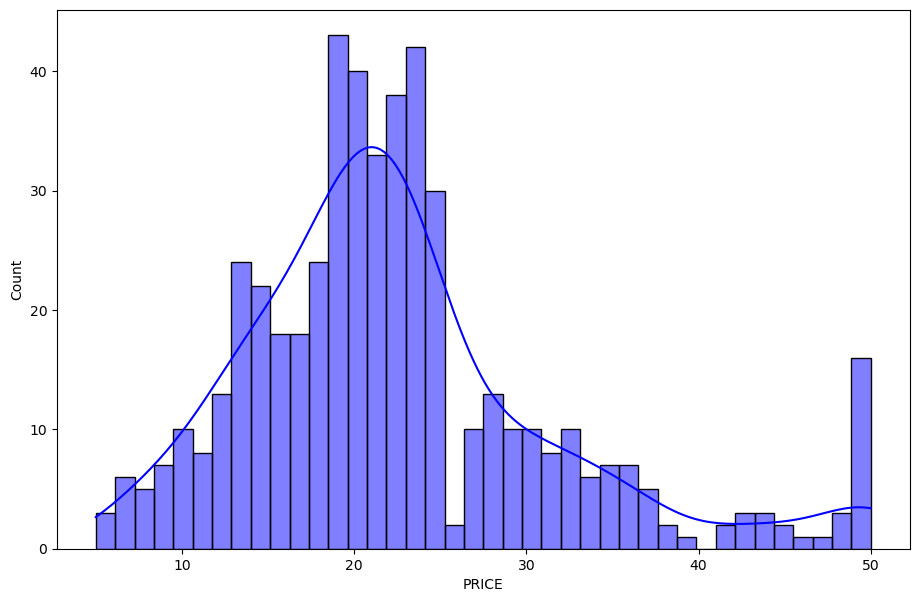

In [12]:
plt.figure(figsize=(11,7))
# sns.distplot(data["PRICE"], bins=40, hist=True, kde=True, color='blue')
sns.histplot(data["PRICE"], bins=40, kde=True, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

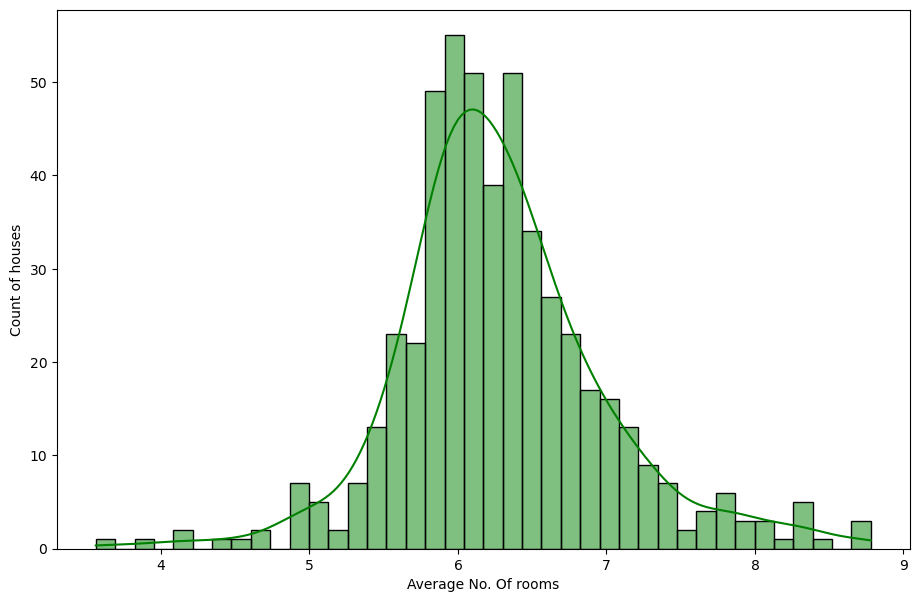

In [20]:
plt.figure(figsize=(11,7))
# sns.distplot(data["RM"], bins=40, hist=True, kde=True)
sns.histplot(data["RM"], bins=40, kde=True, color='green')
plt.ylabel("Count of houses")
plt.xlabel("Average No. Of rooms")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

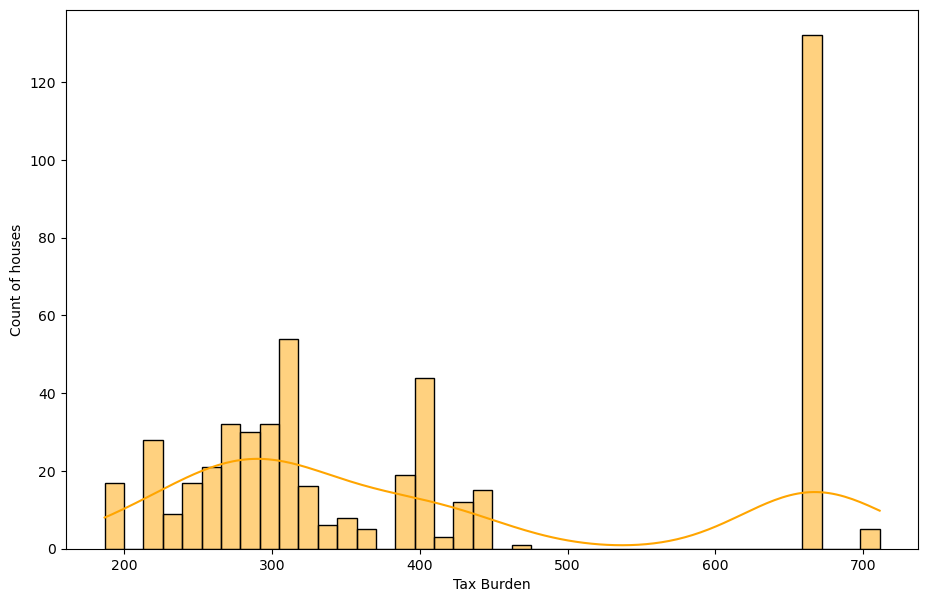

In [21]:
plt.figure(figsize=(11,7))
sns.histplot(data["TAX"], bins=40, kde=True, color='orange')
plt.ylabel("Count of houses")
plt.xlabel("Tax Burden")
plt.show

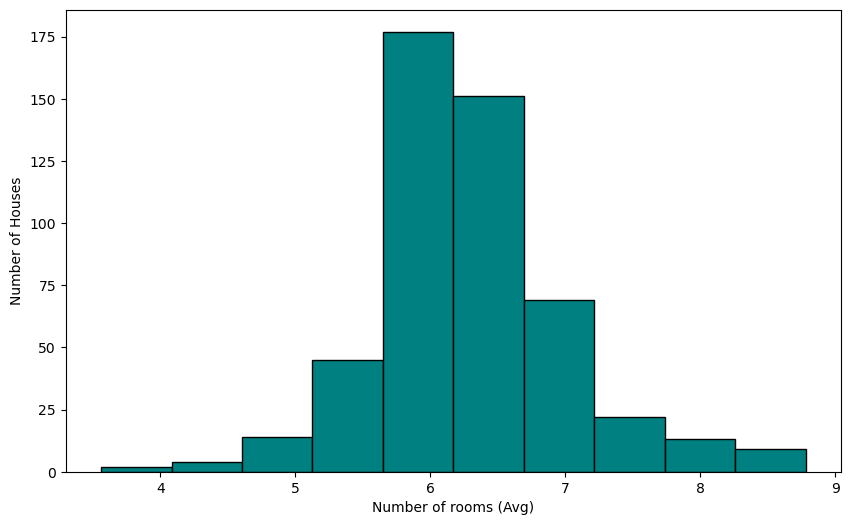

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data["RM"], ec='black', color='Teal')
plt.xlabel("Number of rooms (Avg)")
plt.ylabel("Number of Houses")
plt.show()

In [19]:
mean_rooms = data["RM"].mean()
print(mean_rooms)

6.284634387351779


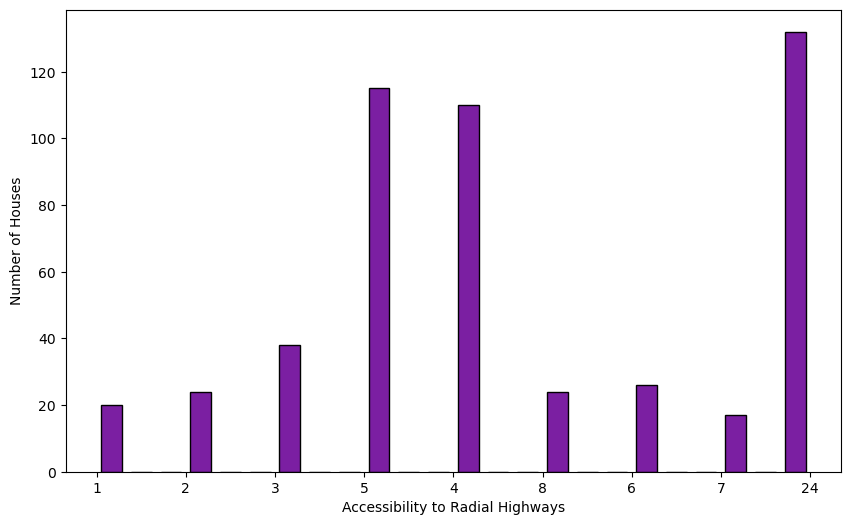

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data["RAD"], bins = 24, ec='black', color='#7B1FA2', rwidth=0.7)
plt.xlabel("Accessibility to Radial Highways")
plt.ylabel("Number of Houses")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

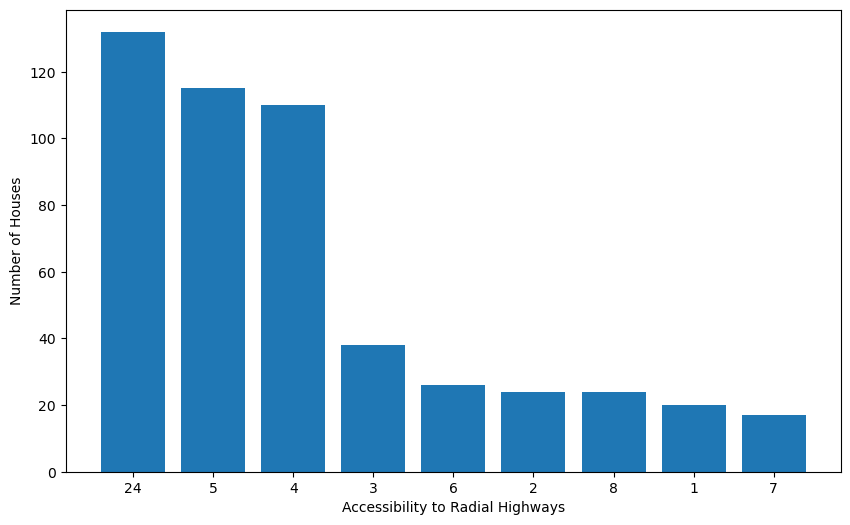

In [21]:
frequency = data["RAD"].value_counts()
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(10,6))
plt.xlabel("Accessibility to Radial Highways")
plt.ylabel("Number of Houses")
plt.bar(frequency.index, height = frequency)
plt.show

In [22]:
data["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Descriptive statistics

In [23]:
data["PRICE"].min()

5.0

In [24]:
data["PRICE"].max()

50.0

In [25]:
data.min()

C:\Users\ryan6\AppData\Local\Temp\ipykernel_18700\927168777.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.min()


CRIM         0.00632
ZN           0.00000
INDUS        0.46000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [26]:
data.max()

C:\Users\ryan6\AppData\Local\Temp\ipykernel_18700\2904433368.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.max()


CRIM        88.9762
ZN         100.0000
INDUS       27.7400
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [27]:
data.mean()

C:\Users\ryan6\AppData\Local\Temp\ipykernel_18700\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


CRIM         3.613524
ZN          11.363636
INDUS       11.136779
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [28]:
data.median()

C:\Users\ryan6\AppData\Local\Temp\ipykernel_18700\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


CRIM         0.25651
ZN           0.00000
INDUS        9.69000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [29]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq +1.0$$ 

In [23]:
#Correlation b/w rooms and price
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [25]:
#Correlation b/w Student-Teacher ratio and price
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [26]:
data.corr() #Pearson Correlation coefficients

C:\Users\ryan6\AppData\Local\Temp\ipykernel_24032\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461
